In [10]:
import numpy as np
import warnings
import litellm
import math
import os
import matplotlib.pyplot as plt
import random

custom_api_base = "https://litellmproxy.osu-ai.org/"
#OSU's LiteLLM proxy server.

from dotenv import load_dotenv
load_dotenv()
#Loading the .env file.

astro1221_key = os.getenv("ASTRO1221_API_KEY")
#Class API key.
if astro1221_key:
    print("Key found")
else:
    print("Did not find key")
    
warnings.filterwarnings("ignore", category=UserWarning, module="pydantic")
#Removing unnecessary warnings.

Key found


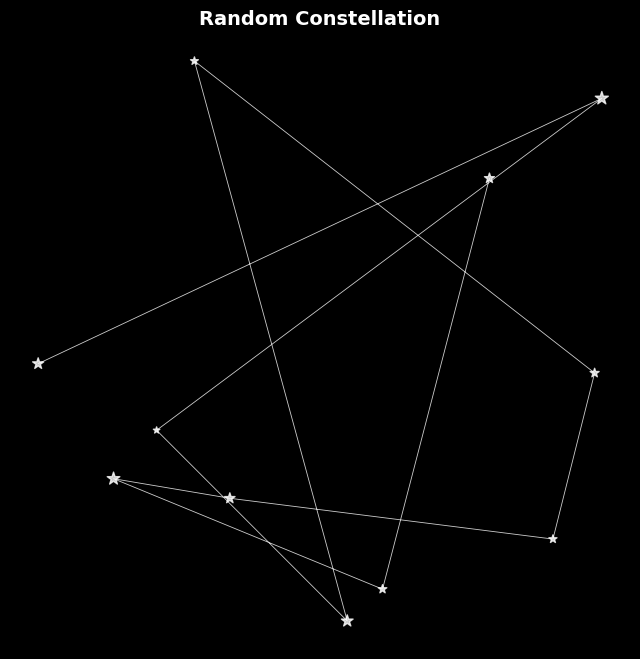

In [11]:
num_stars = random.randrange(10, 20)
def generate_random_constellation(num_stars= random.randrange(10, 20), num_connections= random.randrange(4, 9)):
    #This is to make it easier to call this definition for later constellations.
    if num_stars<12:
        num_connections<6
        #Doing this makes sure that the constellation is only between a certain number of stars.

    fig, ax = plt.subplots(figsize=(8,8), facecolor= 'black')
    ax.set_facecolor("black")
    #Makes the background of the plot black, a stylistic choice.

    x_vals = np.random.uniform(0, 10, num_stars)
    y_vals = np.random.uniform(0, 10, num_stars)
    #Randomizes the location of the stars.

    Constellations = {
        "X-Coordinates": [x_vals],
        "Y-Coordinates": [y_vals]
        }
    #Saves the coordinates into a dictionary.
    
    sizes = np.random.randint(20, 100, num_stars)
    #Randomizes the size of each star.

    ax.scatter(x_vals, y_vals, s=sizes, marker='*', color='white', alpha=0.8)
    #Plots stars.
    
    connections = np.random.choice(num_stars,(num_connections, 2), replace=True)
    #Randomizes the connections between stars.

    for start, end in connections:
        connection = plt.Line2D(x_vals, y_vals, linestyle='-', color='white', linewidth=.6, visible=True, alpha=.8)                 
    ax.add_line(connection)     
    #Draws lines to connect the stars.

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_frame_on(False)
    #Sylistic choice, removes the axes.

    plt.title("Random Constellation", fontsize=14, fontweight="bold", color='white')
    
    fig.savefig(fname="astroplot.png")


generate_random_constellation()

In [9]:
for c in connections:
    distance = math.sqrt(x_vals**2+y_vals**2)
if distance < 1:
    plt.Line2D()

NameError: name 'connections' is not defined

In [12]:
import base64

# Opening the file and reading it as binary
with open("astroplot.png", "rb") as f:
    # Reading the image as binary and converting to Base64
    encoded_image = base64.b64encode(f.read()).decode('utf-8')
    

# Prompting the LLM and setting max token values
response = litellm.completion(
    model = "gemini/gemini-2.5-flash",
    messages = [
        {"role": "system", "content": "You are a Greek theologian, and have to create a story from the given stars. Use Greek myth stories as a base for these."},
        #Context for the LLM
        {"role": "user", "content": [
            {"type": "text", "text": "What is this picture of?"},
            {"type": "image_url", "image_url": {"url": f"data:image/png;base64,{encoded_image}"}}
            #The encoded image being sent to the LLM
        ]}
    ],
    max_tokens = 1000,
    api_base=custom_api_base,
    api_key=astro1221_key,
    temperature=.3
    #LiteLLM Parameters
    )
print(response)


Give Feedback / Get Help: https://github.com/BerriAI/litellm/issues/new
LiteLLM.Info: If you need to debug this error, use `litellm._turn_on_debug()'.



NotFoundError: litellm.NotFoundError: GeminiException - {"detail":"Not Found"}